In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:

filepath = 'XAU_1Month_data_2004_to_2024-09-20.csv'
data = pd.read_csv(filepath)

In [3]:
print(data.head())

         Date   Time   Open   High    Low  Close  Volume
0  2004.06.01  00:00  384.0  404.6  381.1  393.3   24903
1  2004.07.01  00:00  391.6  408.6  384.5  390.5   34840
2  2004.08.01  00:00  390.3  413.8  388.1  409.3   40483
3  2004.09.01  00:00  409.6  418.6  394.3  417.8   47047
4  2004.10.01  00:00  417.8  430.2  409.1  428.1   25857


In [4]:
x = data['Date'].values
y = data['Close'].values

In [5]:
# Converin date to datetime and then to a numerical format
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Update x with the new  date values
x = data['Date_ordinal'].values

# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [6]:
xfit = np.linspace(x.min(), x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

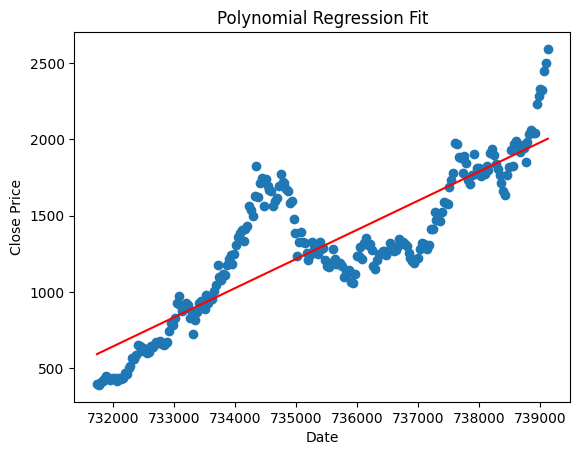

In [8]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Polynomial Regression Fit')
plt.show()